# Objectifs
- Verifier la distribution des données  : 
    - de la target qui sont la proportions d'amyloses

- identifier les outliers et les supprimer de notre database
    - vu qu'on utilise des données spectrales on va utiliser une ACP pour reduire la dimension

In [112]:
import this 

In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline
from chemotools.scatter import StandardNormalVariate
import sys
sys.path.append('/Users/douati/Documents/GitHub/Spectroscopy-project-')
from module_projet.pca_plot import plot_pca_variance,plot_pca_score
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2

In [114]:
# chargement des données
with open("../../data/processed/mmc3.pkl", "rb") as f:
    Xtrain, ytrain, Xtest, ytest, X, wavelengths = pickle.load(f)

# distribution de  l'amylose

## Repartition de la réponse lors de l'entrainement

Text(0.5, 1.0, 'Distribution de la réponse en entraînement')

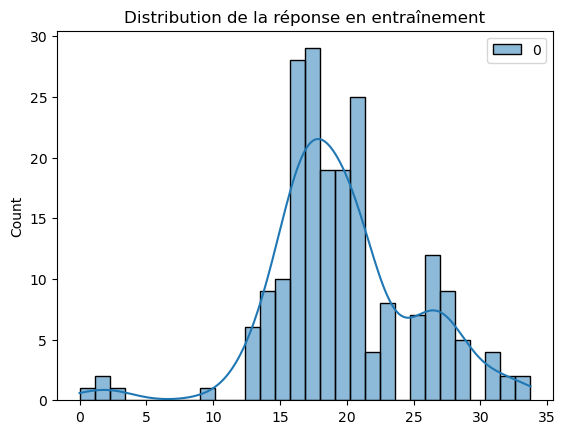

In [115]:
sns.histplot(ytrain, bins=30, kde=True)
plt.title("Distribution de la réponse en entraînement")

Text(0.5, 1.0, 'Distribution de la réponse en test')

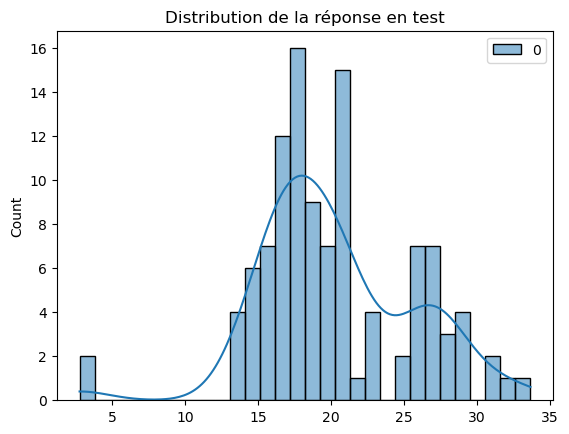

In [116]:
sns.histplot(ytest, bins=30, kde=True)
plt.title("Distribution de la réponse en test")

## conclusion de la repartition

On a une repartition similaire de la reponse entre le jeu d'entrainement et le jeu de test
Cependant on peut supposer que concentration comprise entre 0 et 5 sont éloignés et peuvent être considéré comme des outliers

# identification des outliers en se basant sur les spectres

## Réalisons l'ACP pour reduire la dimension et supprimer les outliers


In [117]:
pca_snv = make_pipeline(StandardNormalVariate(),StandardScaler(),PCA(20))
score=pca_snv.fit_transform(X)
pca = pca_snv.named_steps["pca"]

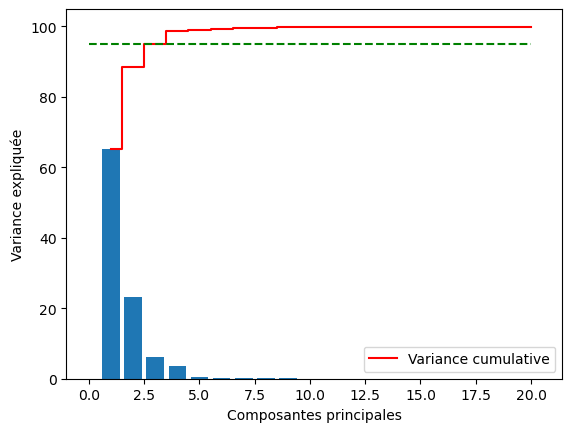

In [118]:
# visualisation de la variance expliquée par les composantes principales
plot_pca_variance(pca)

In [119]:
labels = np.arange(X.shape[0])

In [120]:
plot_pca_score(score,labels=labels,x=0,y=1)

In [121]:
plot_pca_score(score,labels=labels,x=1,y=2)

## identificatioin en utilisant la distance de Mahanalobis


In [122]:
# Calcul de la moyenne et de la matrice de covariance sur les deux premières dimensions
mean = np.mean(score[:, 0:2], axis=0)
cov_matrix = np.cov(score[:, 0:2], rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Paramètres
k = score[:, 0:2].shape[1]  # Nombre de dimensions (2 ici)
alpha = 0.95  # Niveau de confiance (95%)

# Calcul du seuil (quantile de la distribution chi-deux pour k dimensions)
threshold = chi2.ppf(alpha, df=k)

# Calcul des distances de Mahalanobis et identification des outliers
outliers = [i for i, x in enumerate(score[:, 0:2]) if mahalanobis(x, mean, inv_cov_matrix) > np.sqrt(threshold)]

print(f"Seuil défini (distance racine de Mahalanobis) : {np.sqrt(threshold)}")
print(f"Indices des outliers : {outliers}")

Seuil défini (distance racine de Mahalanobis) : 2.447746830680816
Indices des outliers : [52, 72, 82, 86, 104, 154, 155, 178, 179, 354, 355, 356, 357, 360, 361, 362, 363, 364]


# Conclusion 

- Methode visuel :

    - En utilisant se basant sur les scores de l'ACP on  pourrait être amené a identifier des outliers comme ce fut le cas dans l'article  qui nous sert de base : 
        - les individus avec les index : 360; 362 ; 355; 356; 357; 104 ; 108 et autres  visuelement 

- Méthode mathématique : 

    - distance de Mahalanobix

        - Seuil défini (distance racine de Mahalanobis) : 2.447746830680816
            Indices des outliers : [52, 72, 82, 83, 84, 85, 86, 104, 154, 155, 178, 179, 354, 355, 356, 357, 360, 361, 362, 363, 364]

Ici, l'objectif était d'avoir une approche rigoureuse pour eliminer les outliers du jeu de donnée finale pour l'entrainement.
Dans notre dataset que nous avons importer pour le projet nous avons déjà notre dataset :
    - la partie train : pour l'entrainement 
    - la partie test : pour tester notre modèle.

